# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

## PART II: Prediction Model

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import data
data = pd.read_csv("bike-sharing_hourly.csv")
data.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,1,1,1,1,1
yr,0,0,0,0,0
mnth,1,1,1,1,1
hr,0,1,2,3,4
holiday,0,0,0,0,0
weekday,6,6,6,6,6
workingday,0,0,0,0,0
weathersit,1,1,1,1,1


In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### To make the data more readable and for better interpretability, we map the categorical variables to the specified definitions

In [6]:
#Map variables to definition
data['season'] = data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data['yr'] = data['yr'].map({0:2011, 1:2012})
data['mnth'] = data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data['holiday'] = data['holiday'].map({0:'No', 1:'Yes'})
data['weekday'] = data['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
data['workingday'] = data['workingday'].map({0:'No', 1:'Yes'})
data['weathersit'] = data['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

#### Since <em>hr</em> has 24 unique values, its better to bin this field

In [7]:
#Bin hr into 4 categories: Late Night/Early Morning, Morning, Afternoon/Evening, Night
def bin_hr(hr):
    if hr >= 0 and hr < 6:
        return 'Late Night/Early Morning'
    elif hr >= 6 and hr < 12:
        return 'Morning'
    elif hr >= 12 and hr < 18:
        return 'Afternoon/Evening'
    else:
        return 'Night'

data['hr_cat'] = data['hr'].apply(bin_hr)

In [8]:
data.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
season,spring,spring,spring,spring,spring
yr,2011,2011,2011,2011,2011
mnth,Jan,Jan,Jan,Jan,Jan
hr,0,1,2,3,4
holiday,No,No,No,No,No
weekday,Sat,Sat,Sat,Sat,Sat
workingday,No,No,No,No,No
weathersit,Clear,Clear,Clear,Clear,Clear


#### We want to check if there is any pronounced difference between <em>registered</em> and <em>casual</em> users. This will help us decide if we should build separate predictive models for this dataset or just build a single predictive model keeping <em>cnt</em> as the target variable

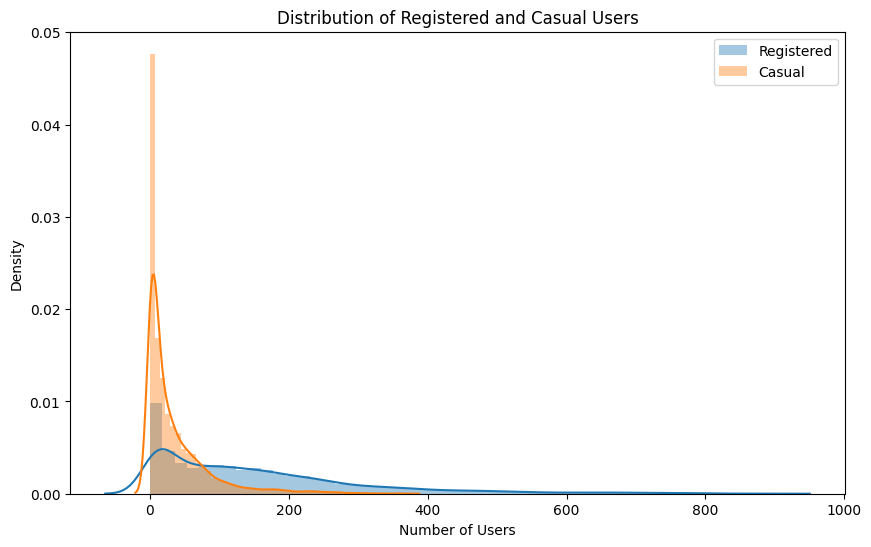

In [9]:
#Plot distribution of registered and casual users
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data['registered'], ax=ax, label='Registered')
sns.distplot(data['casual'], ax=ax, label='Casual')
#sns.distplot(data['cnt'], ax=ax, label='Total')
ax.set_title('Distribution of Registered and Casual Users')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Density')
ax.legend()
plt.show()

#### The distribution of users is right-skewed. This implies that a transformation might be needed to make the distribution more normal.
#### For further clarity, we also check the proportion of casual users vs. registered users

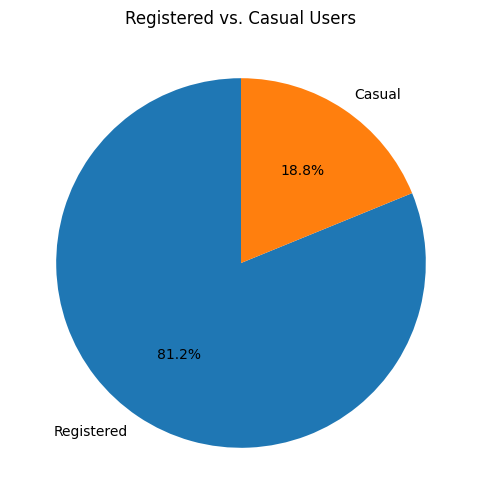

In [10]:
#Pie chart of registered and casual users
fig, ax = plt.subplots(figsize=(10,6))
labels = ['Registered', 'Casual']
ax.pie(data[['registered', 'casual']].sum(), labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Registered vs. Casual Users')
plt.show()

In [ ]:
#Export data for PyCaret
data.to_csv("bike_pycaret.csv", index = False)

## Minimum Viable Model: Linear Regression

#### To deal with the skewness, we decide to try transforming the target variable <em>cnt</em>
#### Using *FunctionTransformer* from *sklearn*, we define a log transform for the target while defining the inverse transform (exponential) function for when we make the predictions

In [11]:
#Define FunctionTransformer from sklearn.preprocessing to transform data
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

data['cnt'] = transformer.transform(data['cnt'].values.reshape(-1,1))
data['registered'] = transformer.transform(data['registered'].values.reshape(-1,1))
data['casual'] = transformer.transform(data['casual'].values.reshape(-1,1))

#### We will be predicting only total users and not registered or casual users for the MVM, for the sake of simplicity.

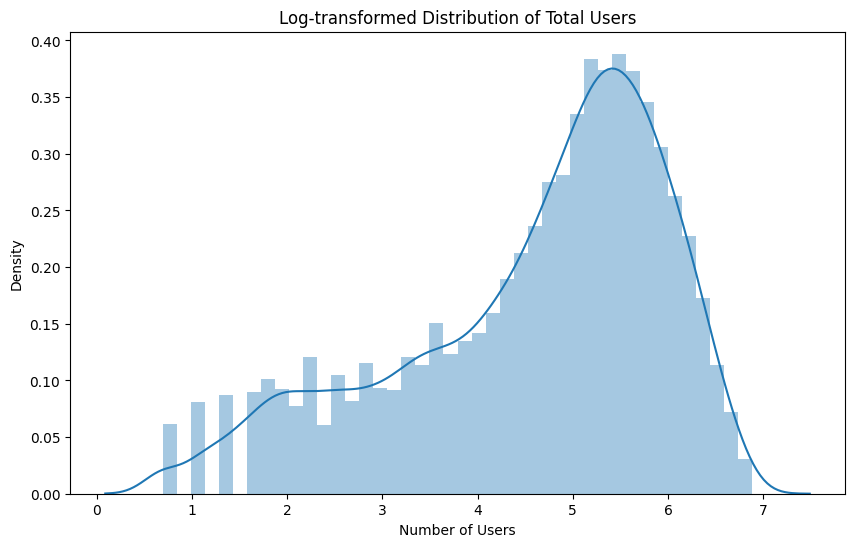

In [12]:
#Plot log-transformed distribution of total users
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(data['cnt'], ax=ax)
ax.set_title('Log-transformed Distribution of Total Users')
ax.set_xlabel('Number of Users')
ax.set_ylabel('Density')
plt.show()

#### We can see that the distribution is much more normalised now and thus should help our predictive MVM

#### We decide to drop a few features carrying irrelevant (to predict total users) information or similar information as other features from the input features set: X
##### <em>temp</em> gives the actual temperature of the day but users are more likely to make a decision based on the feeling temperature <em>atemp</em>
##### <em>season</em> is just a categorised version of <em>mnth</em> and opting for it over the latter could lead our model to lose useful predictive power

In [13]:
#Split data into X and y
X = data.drop(['instant', 'cnt', 'casual', 'registered', 'dteday', 'temp', 'hr', 'season'], axis = 1)
y = data['cnt']

#### We dummy encode the categorical variables

In [14]:
#Extract categorical variables
cat_var = X.select_dtypes(include = ['object']).columns

In [15]:
#Dummy encode categorical variables
X = pd.get_dummies(X, columns = cat_var, drop_first = True)

#### Using *Recursive Feature Elimination*, we also decide to extract the most important features for our MVM

In [16]:
#Recursive Feature Selection 
from sklearn.feature_selection import RFE

NUM_FEATURES = 5
model = LinearRegression()

rfe_stand = RFE(model, step=NUM_FEATURES)

In [17]:
fit_stand = rfe_stand.fit(X, y)

print("Std Model Feature Ranking:", fit_stand.ranking_)

# calculate the score for the selected features
score_stand = rfe_stand.score(X, y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking: [1 1 1 4 4 4 2 1 2 4 3 3 1 1 2 1 3 1 1 3 2 3 1 1 1 4 1 1 2]
Standardized Model Score with selected features is: 0.707041 (0.000000)


In [18]:
train_names = np.array(X.columns)
print('Most important features (RFE): %s'% train_names[rfe_stand.support_])

Most important features (RFE): ['yr' 'atemp' 'hum' 'mnth_Jan' 'mnth_Nov' 'mnth_Oct' 'holiday_Yes'
 'weekday_Sat' 'weekday_Sun' 'workingday_Yes' 'weathersit_Heavy Rain'
 'weathersit_Light Snow' 'hr_cat_Late Night/Early Morning'
 'hr_cat_Morning']


#### We see that 'yr' 'atemp' 'hum' 'mnth_Jan' 'mnth_Nov' 'mnth_Oct' 'holiday_Yes' 'weekday_Sat' 'weekday_Sun' 'workingday_Yes' 'weathersit_Heavy Rain' 'weathersit_Light Snow' 'hr_cat_Late Night/Early Morning' 'hr_cat_Morning' are selected as the mopst important features
#### We create a separate input set with the most important features

In [19]:
X_imp = X[train_names[rfe_stand.support_]]

In [20]:
#Select numeric variables
num_var = X_imp.select_dtypes(include = ['int64', 'float64']).columns

#### Splitting data into train and test with X_imp

In [21]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 14), (3476, 14), (13903,), (3476,))

#### We use *MinMaxScaler* to scale only the numerical features

In [22]:
#Scale numeric variables for train and test
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test[num_var] = scaler.transform(X_test[num_var])
X_test = pd.DataFrame(X_test, columns=X_test.columns)

#### Fitting the model

In [24]:
#Fit model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### Plotting the predictions on the test data

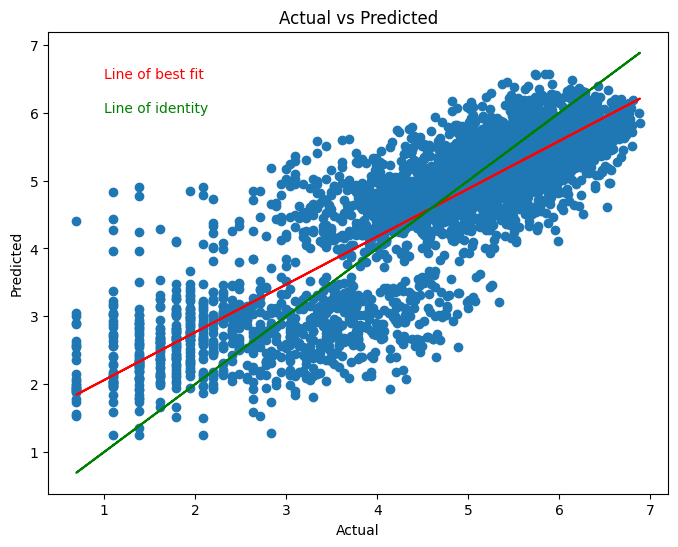

In [62]:
#Plot predicted vs actual
y_pred = linreg.predict(X_test)

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
#Add line of best fit
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color = 'red')
#Add line of identity
plt.plot(y_test, y_test, color = 'green')
#Add labels
plt.text(1,6.5,'Line of best fit', color = 'red')
plt.text(1,6,'Line of identity', color = 'green')
plt.show()

#### Inverse transforming y to calculate MAE

In [49]:
y_tr_inv = transformer.inverse_transform(y_train.values.reshape(-1,1))

In [52]:
y_pred_train = linreg.predict(X_train)
y_pred_train = transformer.inverse_transform(y_pred_train.reshape(-1,1))

In [55]:
print("Train score (MAE): ", round(mean_absolute_error(y_tr_inv,y_pred_train),3))

Train score (MAE):  85.66


In [65]:
y_te_inv = transformer.inverse_transform(y_test.values.reshape(-1,1))

In [66]:
y_pred = linreg.predict(X_test)
y_pred = transformer.inverse_transform(y_pred.reshape(-1,1))

In [67]:
print("Test score (MAE): ", round(mean_absolute_error(y_te_inv,y_pred),3))

Test score (MAE):  83.395


## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###
